In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("USvideos.csv")

In [3]:
uniqueLikeDislike = pd.pivot_table(df,index=['video_id'], values=['likes','dislikes'], aggfunc={'likes':max,'dislikes':max})
uniqueLikeDislike

,dislikes,likes
video_id,,
-0CMnp02rNY,332,9773
-0NYY8cqdiQ,54,4429
-1Hm41N0dUs,580,41248
-1yT-K3c6YI,212,7734
-2RVw2_QyxQ,27,460
...,...,...
zwEn-ambXLw,144,8478
zxUwbflE1SY,150,5770
zxwfDlhJIpw,19462,166520


In [4]:
uniqueTagsTitle = df.drop_duplicates(keep='first', subset='video_id').set_index('video_id')[['tags', 'title']]
uniqueTagsTitle

,tags,title
video_id,,
2kyS6SvSYSE,SHANtell martin,WE WANT TO TALK ABOUT OUR MARRIAGE
1ZAPwfrtAFY,"last week tonight trump presidency|""last week ...",The Trump Presidency: Last Week Tonight with J...
5qpjK5DgCt4,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","Racist Superman | Rudy Mancuso, King Bach & Le..."
puqaWrEC7tY,"rhett and link|""gmm""|""good mythical morning""|""...",Nickelback Lyrics: Real or Fake?
d380meD0W0M,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I Dare You: GOING BALD!?
...,...,...
dS5Thrl-4Kc,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",CRAYOLA MAKEUP | HIT OR MISS?
JGm9Y_hFqNk,"espn|""espn live""|""boston celtics""|""kyrie irvin...",First Take reacts: Kyrie Irving says contract ...
6h8QgZF5Qu4,"The Late Late Show|""Late Late Show""|""James Cor...",Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs


In [5]:
df = uniqueTagsTitle.join(uniqueLikeDislike)
df

,tags,title,dislikes,likes
video_id,,,,
2kyS6SvSYSE,SHANtell martin,WE WANT TO TALK ABOUT OUR MARRIAGE,7972,96321
1ZAPwfrtAFY,"last week tonight trump presidency|""last week ...",The Trump Presidency: Last Week Tonight with J...,11508,151250
5qpjK5DgCt4,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","Racist Superman | Rudy Mancuso, King Bach & Le...",7278,187303
puqaWrEC7tY,"rhett and link|""gmm""|""good mythical morning""|""...",Nickelback Lyrics: Real or Fake?,1386,16729
d380meD0W0M,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I Dare You: GOING BALD!?,2416,153395
...,...,...,...,...
dS5Thrl-4Kc,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",CRAYOLA MAKEUP | HIT OR MISS?,895,26166
JGm9Y_hFqNk,"espn|""espn live""|""boston celtics""|""kyrie irvin...",First Take reacts: Kyrie Irving says contract ...,320,7701
6h8QgZF5Qu4,"The Late Late Show|""Late Late Show""|""James Cor...",Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,399,18811


In [6]:
df.drop(df[df['dislikes'] == 0].index, inplace = True)
df

,tags,title,dislikes,likes
video_id,,,,
2kyS6SvSYSE,SHANtell martin,WE WANT TO TALK ABOUT OUR MARRIAGE,7972,96321
1ZAPwfrtAFY,"last week tonight trump presidency|""last week ...",The Trump Presidency: Last Week Tonight with J...,11508,151250
5qpjK5DgCt4,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","Racist Superman | Rudy Mancuso, King Bach & Le...",7278,187303
puqaWrEC7tY,"rhett and link|""gmm""|""good mythical morning""|""...",Nickelback Lyrics: Real or Fake?,1386,16729
d380meD0W0M,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I Dare You: GOING BALD!?,2416,153395
...,...,...,...,...
dS5Thrl-4Kc,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",CRAYOLA MAKEUP | HIT OR MISS?,895,26166
JGm9Y_hFqNk,"espn|""espn live""|""boston celtics""|""kyrie irvin...",First Take reacts: Kyrie Irving says contract ...,320,7701
6h8QgZF5Qu4,"The Late Late Show|""Late Late Show""|""James Cor...",Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,399,18811


In [7]:
df['ldr'] = df['likes'] / df['dislikes']

In [8]:
df[df['ldr'].isnull()]

,tags,title,dislikes,likes,ldr
video_id,,,,,


In [9]:
df[df['ldr'] == np.inf]

,tags,title,dislikes,likes,ldr
video_id,,,,,


In [10]:
df.reset_index(drop=True, inplace=True)
df

,tags,title,dislikes,likes,ldr
0,SHANtell martin,WE WANT TO TALK ABOUT OUR MARRIAGE,7972,96321,12.082413
1,"last week tonight trump presidency|""last week ...",The Trump Presidency: Last Week Tonight with J...,11508,151250,13.143031
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","Racist Superman | Rudy Mancuso, King Bach & Le...",7278,187303,25.735504
3,"rhett and link|""gmm""|""good mythical morning""|""...",Nickelback Lyrics: Real or Fake?,1386,16729,12.069986
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I Dare You: GOING BALD!?,2416,153395,63.491308
...,...,...,...,...,...
6253,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",CRAYOLA MAKEUP | HIT OR MISS?,895,26166,29.235754
6254,"espn|""espn live""|""boston celtics""|""kyrie irvin...",First Take reacts: Kyrie Irving says contract ...,320,7701,24.065625
6255,"The Late Late Show|""Late Late Show""|""James Cor...",Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,399,18811,47.145363
6256,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",Carla Makes BA Smashburgers | From the Test Ki...,693,14206,20.499278


In [11]:
df.loc[df['tags'] == '[none]', 'tags'] = "emptynone"
df

,tags,title,dislikes,likes,ldr
0,SHANtell martin,WE WANT TO TALK ABOUT OUR MARRIAGE,7972,96321,12.082413
1,"last week tonight trump presidency|""last week ...",The Trump Presidency: Last Week Tonight with J...,11508,151250,13.143031
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","Racist Superman | Rudy Mancuso, King Bach & Le...",7278,187303,25.735504
3,"rhett and link|""gmm""|""good mythical morning""|""...",Nickelback Lyrics: Real or Fake?,1386,16729,12.069986
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I Dare You: GOING BALD!?,2416,153395,63.491308
...,...,...,...,...,...
6253,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",CRAYOLA MAKEUP | HIT OR MISS?,895,26166,29.235754
6254,"espn|""espn live""|""boston celtics""|""kyrie irvin...",First Take reacts: Kyrie Irving says contract ...,320,7701,24.065625
6255,"The Late Late Show|""Late Late Show""|""James Cor...",Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,399,18811,47.145363
6256,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",Carla Makes BA Smashburgers | From the Test Ki...,693,14206,20.499278


In [12]:
df['tags'][df['tags'] == 'emptynone'].count() / df['tags'].count()

0.03962927452860339

In [13]:
df.loc[df['ldr'] >= df['ldr'].median(), 'category'] = 2
df.loc[df['ldr'] < df['ldr'].median(), 'category'] = 1
df

,tags,title,dislikes,likes,ldr,category
0,SHANtell martin,WE WANT TO TALK ABOUT OUR MARRIAGE,7972,96321,12.082413,1.0
1,"last week tonight trump presidency|""last week ...",The Trump Presidency: Last Week Tonight with J...,11508,151250,13.143031,1.0
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","Racist Superman | Rudy Mancuso, King Bach & Le...",7278,187303,25.735504,1.0
3,"rhett and link|""gmm""|""good mythical morning""|""...",Nickelback Lyrics: Real or Fake?,1386,16729,12.069986,1.0
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I Dare You: GOING BALD!?,2416,153395,63.491308,2.0
...,...,...,...,...,...,...
6253,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",CRAYOLA MAKEUP | HIT OR MISS?,895,26166,29.235754,2.0
6254,"espn|""espn live""|""boston celtics""|""kyrie irvin...",First Take reacts: Kyrie Irving says contract ...,320,7701,24.065625,1.0
6255,"The Late Late Show|""Late Late Show""|""James Cor...",Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,399,18811,47.145363,2.0
6256,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",Carla Makes BA Smashburgers | From the Test Ki...,693,14206,20.499278,1.0


In [14]:
df['category'] = df['category'].astype(int)
df

,tags,title,dislikes,likes,ldr,category
0,SHANtell martin,WE WANT TO TALK ABOUT OUR MARRIAGE,7972,96321,12.082413,1
1,"last week tonight trump presidency|""last week ...",The Trump Presidency: Last Week Tonight with J...,11508,151250,13.143031,1
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","Racist Superman | Rudy Mancuso, King Bach & Le...",7278,187303,25.735504,1
3,"rhett and link|""gmm""|""good mythical morning""|""...",Nickelback Lyrics: Real or Fake?,1386,16729,12.069986,1
4,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I Dare You: GOING BALD!?,2416,153395,63.491308,2
...,...,...,...,...,...,...
6253,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",CRAYOLA MAKEUP | HIT OR MISS?,895,26166,29.235754,2
6254,"espn|""espn live""|""boston celtics""|""kyrie irvin...",First Take reacts: Kyrie Irving says contract ...,320,7701,24.065625,1
6255,"The Late Late Show|""Late Late Show""|""James Cor...",Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,399,18811,47.145363,2
6256,"bon appetit|""burgers""|""cheeseburgers""|""how to ...",Carla Makes BA Smashburgers | From the Test Ki...,693,14206,20.499278,1


In [15]:
titles = df[['category','title']].copy()
titles

,category,title
0,1,WE WANT TO TALK ABOUT OUR MARRIAGE
1,1,The Trump Presidency: Last Week Tonight with J...
2,1,"Racist Superman | Rudy Mancuso, King Bach & Le..."
3,1,Nickelback Lyrics: Real or Fake?
4,2,I Dare You: GOING BALD!?
...,...,...
6253,2,CRAYOLA MAKEUP | HIT OR MISS?
6254,1,First Take reacts: Kyrie Irving says contract ...
6255,2,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs
6256,1,Carla Makes BA Smashburgers | From the Test Ki...


In [16]:
tags = df[['category', 'tags']].copy()
tags

,category,tags
0,1,SHANtell martin
1,1,"last week tonight trump presidency|""last week ..."
2,1,"racist superman|""rudy""|""mancuso""|""king""|""bach""..."
3,1,"rhett and link|""gmm""|""good mythical morning""|""..."
4,2,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""..."
...,...,...
6253,2,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ..."
6254,1,"espn|""espn live""|""boston celtics""|""kyrie irvin..."
6255,2,"The Late Late Show|""Late Late Show""|""James Cor..."
6256,1,"bon appetit|""burgers""|""cheeseburgers""|""how to ..."


In [17]:
import re
tags['tags'] = tags['tags'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+', ' ', x).lower())
tags

,category,tags
0,1,shantell martin
1,1,last week tonight trump presidency last week t...
2,1,racist superman rudy mancuso king bach racist ...
3,1,rhett and link gmm good mythical morning rhett...
4,2,ryan higa higatv nigahiga i dare you idy rhpc ...
...,...,...
6253,2,laura88lee crayola crayon makeup crayola beaut...
6254,1,espn espn live boston celtics kyrie irving kyr...
6255,2,the late late show late late show james corden...
6256,1,bon appetit burgers cheeseburgers how to cook ...


In [18]:
titles['title'] = titles['title'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+', ' ', x).lower())
titles

,category,title
0,1,we want to talk about our marriage
1,1,the trump presidency last week tonight with j...
2,1,racist superman rudy mancuso king bach le...
3,1,nickelback lyrics real or fake
4,2,i dare you going bald
...,...,...
6253,2,crayola makeup hit or miss
6254,1,first take reacts kyrie irving says contract ...
6255,2,drop the mic w ashton kutcher sean diddy combs
6256,1,carla makes ba smashburgers from the test ki...


In [19]:
from sklearn.model_selection import train_test_split

trainTagsx, testTagsx, trainTagsy, testTagsy = train_test_split(tags['tags'], tags['category'], test_size=0.20, random_state=0)
valTagsx, testTagsx, valTagsy, testTagsy = train_test_split(testTagsx, testTagsy, test_size=0.50, random_state=0)

trainTitlesx, testTitlesx, trainTitlesy, testTitlesy = train_test_split(titles['title'], titles['category'], test_size=0.20, random_state=0)
valTitlesx, testTitlesx, valTitlesy, testTitlesy = train_test_split(testTitlesx, testTitlesy, test_size=0.50, random_state=0)

In [20]:
print(len(valTagsx) / len(trainTagsx))
print(len(valTitlesx) / len(trainTitlesx))

0.1250499400719137
0.1250499400719137


In [21]:
trainTags = pd.concat([trainTagsy, trainTagsx], axis=1)
testTags = pd.concat([testTagsy, testTagsx], axis=1)
valTags = pd.concat([valTagsy, valTagsx], axis=1)

trainTitles = pd.concat([trainTitlesy, trainTitlesx], axis=1)
testTitles = pd.concat([testTitlesy, testTitlesx], axis=1)
valTitles = pd.concat([valTitlesy, valTitlesx], axis=1)

In [22]:
trainTags.to_csv('trainTags.csv', header=False, index=False)
testTags.to_csv('testTags.csv', header=False, index=False)
valTags.to_csv('valTags.csv', header=False, index=False)

trainTitles.to_csv('trainTitles.csv', header=False, index=False)
testTitles.to_csv('testTitles.csv', header=False, index=False)
valTitles.to_csv('valTitles.csv', header=False, index=False)

In [23]:
import torch
import torchtext

In [24]:
ngrams = 1
trainTagsPath = 'trainTags.csv'
testTagsPath = 'testTags.csv'
valTagsPath = 'valTags.csv'
trainTitlesPath = 'trainTitles.csv'
testTitlesPath = 'testTitles.csv'
valTitlesPath = 'valTitles.csv'

In [25]:
vocabTags = torchtext.vocab.build_vocab_from_iterator(
    torchtext.datasets.text_classification._csv_iterator(trainTagsPath, ngrams))

vocabTitles = torchtext.vocab.build_vocab_from_iterator(
    torchtext.datasets.text_classification._csv_iterator(trainTitlesPath, ngrams))

5006lines [00:00, 30790.18lines/s]
5006lines [00:00, 79614.32lines/s]


In [26]:
trainDataTags, trainLabelsTags = torchtext.datasets.text_classification._create_data_from_iterator(
        vocabTags, torchtext.datasets.text_classification._csv_iterator(trainTagsPath, ngrams, yield_cls=True), False)

trainDataTitles, trainLabelsTitles = torchtext.datasets.text_classification._create_data_from_iterator(
        vocabTitles, torchtext.datasets.text_classification._csv_iterator(trainTitlesPath, ngrams, yield_cls=True), False)

5006lines [00:00, 18317.03lines/s]
5006lines [00:00, 33697.68lines/s]


In [27]:
testDataTags, testLabelsTags = torchtext.datasets.text_classification._create_data_from_iterator(
        vocabTags, torchtext.datasets.text_classification._csv_iterator(testTagsPath, ngrams, yield_cls=True), False)

testDataTitles, testLabelsTitles = torchtext.datasets.text_classification._create_data_from_iterator(
        vocabTitles, torchtext.datasets.text_classification._csv_iterator(testTitlesPath, ngrams, yield_cls=True), False)

626lines [00:00, 15686.01lines/s]
626lines [00:00, 29894.84lines/s]


In [28]:
valDataTags, valLabelsTags = torchtext.datasets.text_classification._create_data_from_iterator(
        vocabTags, torchtext.datasets.text_classification._csv_iterator(valTagsPath, ngrams, yield_cls=True), False)

valDataTitles, valLabelsTitles = torchtext.datasets.text_classification._create_data_from_iterator(
        vocabTitles, torchtext.datasets.text_classification._csv_iterator(valTitlesPath, ngrams, yield_cls=True), False)

626lines [00:00, 14944.70lines/s]
626lines [00:00, 28533.30lines/s]


In [29]:
if len(trainLabelsTags ^ testLabelsTags) > 0:
    raise ValueError("Training and test labels don't match")
if len(trainLabelsTitles ^ testLabelsTitles) > 0:
    raise ValueError("Training and test labels don't match")

In [30]:
TagsTrain = torchtext.datasets.TextClassificationDataset(vocabTags, trainDataTags, trainLabelsTags)
TagsTest = torchtext.datasets.TextClassificationDataset(vocabTags, testDataTags, testLabelsTags)
TagsVal = torchtext.datasets.TextClassificationDataset(vocabTags, valDataTags, valLabelsTags)


TitlesTrain = torchtext.datasets.TextClassificationDataset(vocabTitles, trainDataTitles, trainLabelsTitles)
TitlesTest = torchtext.datasets.TextClassificationDataset(vocabTitles, testDataTitles, testLabelsTitles)
TitlesVal = torchtext.datasets.TextClassificationDataset(vocabTitles, valDataTitles, valLabelsTitles)


In [31]:
print(TagsTrain[0])

print(TitlesTrain[0])

print(TitlesVal[0])

(1, tensor([10793,  2477,   817,   534,    18,  3093,  1936, 10260]))
(1, tensor([8542, 1638,  742,   95,   13,   34]))
(0, tensor([   0, 3859, 7679, 1693,    5,    0, 5822, 2343,  419,   70,  285, 1044]))


In [32]:
from torch.nn.utils.rnn import pad_sequence

def collator(batch):
    labels = torch.tensor([e[0] for e in batch])
    sentences = [e[1] for e in batch]
    data = pad_sequence(sentences)
    
    return [data, labels]

In [33]:
BATCH_SIZE = 128

TagsTrainLoader = torch.utils.data.DataLoader(TagsTrain, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collator)
TagsTestLoader = torch.utils.data.DataLoader(TagsTest, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collator)
TagsValLoader = torch.utils.data.DataLoader(TagsVal, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collator)


TitlesTrainLoader = torch.utils.data.DataLoader(TitlesTrain, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collator)
TitlesTestLoader = torch.utils.data.DataLoader(TitlesTest, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collator)
TitlesValLoader = torch.utils.data.DataLoader(TitlesVal, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collator)


In [58]:
VOCAB_SIZE_TAGS = len(TagsTrain.get_vocab())
VOCAB_SIZE_TITLES = len(TitlesTrain.get_vocab())
EMBED_DIM = 64
HIDDEN_DIM = 8
NUM_OUTPUTS = 1
NUM_EPOCHS = 3
DROPOUT_RATE = .5

In [59]:
import torch.nn as nn
import torch.nn.functional as F

class SWEM(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_dim, num_outputs, dropout_rate):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.fc1 = nn.Linear(embedding_size, hidden_dim)
        self.drop = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, num_outputs)

    def forward(self, x):
        embed = self.embedding(x)
        h = torch.mean(embed, dim=0)
        h = self.drop(h)
        h = self.fc1(h)
        h = F.relu(h)
        h = self.drop(h)
        h = self.fc2(h)
        return h
    
    def get_embeddings(self, x):
        embed = self.embedding(x)
        embed_mean = torch.mean(embed, dim=0)
        return embed_mean

In [60]:
# Instantiate model
modelTags = SWEM(vocab_size=VOCAB_SIZE_TAGS, embedding_size=EMBED_DIM, hidden_dim=HIDDEN_DIM, num_outputs=NUM_OUTPUTS, dropout_rate=DROPOUT_RATE)

# Binary cross-entropy (BCE) Loss and Adam Optimizer
lr = 1e-3
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(modelTags.parameters(), lr=lr)

# Number of training epochs
n_epochs = 20
n_steps = 100

# Iterate through train set minibatchs
print('Training SWEM model...\n')
modelTags.train()
for epoch in range(n_epochs):
    # Initialize sums
    correct_sum = 0
    num_examples_sum = 0
    loss_sum = 0
    
    # Iterate over number of training examples
    step_counter = 0
    for inputs, labels in TagsTrainLoader:
        labels = labels.float()
        # Zero out the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = modelTags.forward(inputs).view(-1)

        loss = criterion(y_pred, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Update sums
        predictions = torch.round(torch.sigmoid(y_pred))
        correct_sum += torch.sum((predictions == labels).float()).item()
        num_examples_sum += len(labels)
        loss_sum += loss.item()

        # Increment step counter
        if step_counter is not None:
            step_counter += 1
            if step_counter >= n_steps:
                break

    # Calculate epoch metrics
    acc_train = correct_sum / num_examples_sum
    loss_train = loss_sum / num_examples_sum
    
    modelTags.eval()
    correct_sum = 0
    num_examples_sum = 0
    loss_sum = 0
    with torch.no_grad():
        # Iterate over number of validation examples
        for inputs, labels in TagsValLoader:
            # Forward pass
            y_pred = modelTags(inputs).view(-1)
            # Update sums
            predictions = torch.round(torch.sigmoid(y_pred))
            correct_sum += torch.sum((predictions == labels).float()).item()
            num_examples_sum += len(labels)
    val_acc = correct_sum / num_examples_sum
    # Display results
    print('  >> Epoch %d:  loss=%.4f, acc=%.4f, Val: acc=%.4f' % (epoch + 1, loss_train, acc_train, val_acc))

# Training complete
print('\nTraining complete.\n')

# Evaluate on test set
modelTags.eval()
correct_sum = 0
num_examples_sum = 0
loss_sum = 0
print('Evaluating model on test set...')
with torch.no_grad():
    # Iterate over number of training examples
    for inputs, labels in TagsTestLoader:
        # Forward pass
        y_pred = modelTags(inputs).view(-1)
        
        # Update sums
        predictions = torch.round(torch.sigmoid(y_pred))
        correct_sum += torch.sum((predictions == labels).float()).item()
        num_examples_sum += len(labels)
    
# Calculate epoch metrics
print('Test set evaluation complete.\n')
test_acc = correct_sum / num_examples_sum

# Display results
print('Test accuracy:  %.4f\n' % (test_acc))

Training SWEM model...

  >> Epoch 1:  loss=0.0056, acc=0.5076, Val: acc=0.5128
  >> Epoch 2:  loss=0.0055, acc=0.5098, Val: acc=0.5160
  >> Epoch 3:  loss=0.0055, acc=0.5531, Val: acc=0.5256
  >> Epoch 4:  loss=0.0055, acc=0.5559, Val: acc=0.5176
  >> Epoch 5:  loss=0.0055, acc=0.5837, Val: acc=0.5703
  >> Epoch 6:  loss=0.0055, acc=0.5847, Val: acc=0.5319
  >> Epoch 7:  loss=0.0054, acc=0.6131, Val: acc=0.6422
  >> Epoch 8:  loss=0.0053, acc=0.6570, Val: acc=0.6342
  >> Epoch 9:  loss=0.0051, acc=0.7012, Val: acc=0.6134
  >> Epoch 10:  loss=0.0048, acc=0.7389, Val: acc=0.6550
  >> Epoch 11:  loss=0.0044, acc=0.7471, Val: acc=0.6454
  >> Epoch 12:  loss=0.0041, acc=0.7805, Val: acc=0.7125
  >> Epoch 13:  loss=0.0038, acc=0.8010, Val: acc=0.6949
  >> Epoch 14:  loss=0.0035, acc=0.8210, Val: acc=0.6661
  >> Epoch 15:  loss=0.0033, acc=0.8394, Val: acc=0.6821
  >> Epoch 16:  loss=0.0031, acc=0.8396, Val: acc=0.6949
  >> Epoch 17:  loss=0.0029, acc=0.8594, Val: acc=0.6885
  >> Epoch 18:  

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Put model in evaluation mode
modelTags.eval()

# Don't calculate gradients - this speeds up inference and decreases memory requirements
with torch.no_grad():
    # Initialize array variables
    embeddings_test = None
    labels_test = None
    
    # Iterate over number of test examples
    for inputs, labels in TagsTestLoader:
        # Retrieve trained embeddings for each test set example
        embeddings_batch = modelTags.get_embeddings(inputs)
        embeddings_batch = embeddings_batch.detach().cpu().numpy()
        labels = labels.detach().cpu().numpy()

        # Concatenate embeddings and labels to arrays
        if labels_test is None:
            embeddings_test = embeddings_batch
            labels_test = labels
        else:
            embeddings_test = np.concatenate((embeddings_test, embeddings_batch), axis=0)
            labels_test = np.concatenate((labels_test, labels), axis=0)

# Display array sizes
print('Embeddings size:  (%d, %d)' % (embeddings_test.shape))
print('Labels size:  (%d)' % (labels_test.shape))

Embeddings size:  (626, 64)
Labels size:  (626)


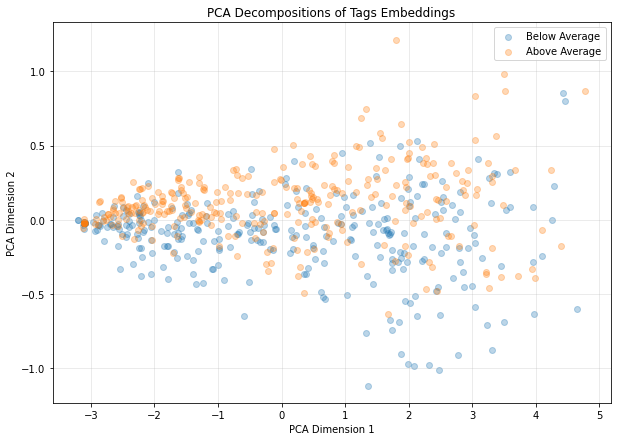

In [62]:
# Set number of components to 2 so we can visualize embeddings in a 2D plot
n_components = 2   

# Instantiate PCA model
pca = PCA(n_components=n_components)

# Transform embeddings using PCA
pca_embeddings = pca.fit_transform(embeddings_test)

# Create labels dictionary
labels_dict = {0: 'Below Average', 1: 'Above Average'}

# Plot PCA decomposition of word embeddings - color code according to topic
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
for i in range(2):
    ax1.scatter(pca_embeddings[np.where(labels_test==i), 0], pca_embeddings[np.where(labels_test==i), 1],
                alpha=0.3, label=labels_dict[i])
ax1.set_xlabel('PCA Dimension 1')
ax1.set_ylabel('PCA Dimension 2')
ax1.set_title('PCA Decompositions of Tags Embeddings')
ax1.grid(alpha=0.3)
ax1.legend(loc='upper right')

plt.savefig('PCA_tags.png')
# Display plot
plt.show()

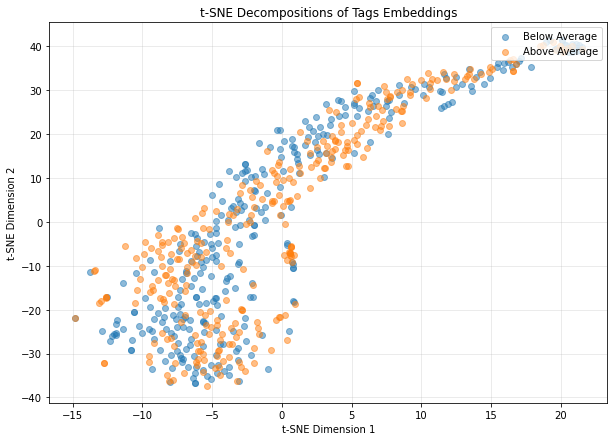

In [63]:
# Set number of components to 2 so we can visualize embeddings in a 2D plot
n_components = 2

# Instantiate t-SNE model
tsne = TSNE(n_components=n_components, random_state=0)

# Transform embeddings using t-SNE
tsne_embeddings = tsne.fit_transform(embeddings_test)

# Plot PCA decomposition of word embeddings - color code according to topic
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
for i in range(2):
    ax1.scatter(tsne_embeddings[np.where(labels_test==i), 0], tsne_embeddings[np.where(labels_test==i), 1],
                alpha=0.5, label=labels_dict[i])
ax1.set_xlabel('t-SNE Dimension 1')
ax1.set_ylabel('t-SNE Dimension 2')
ax1.set_title('t-SNE Decompositions of Tags Embeddings')
ax1.grid(alpha=0.3)
ax1.legend(loc='upper right')

plt.savefig('tSNE_tags.png')
# Display plot
plt.show()

In [64]:
# Instantiate model
modelTitles = SWEM(vocab_size=VOCAB_SIZE_TITLES, embedding_size=EMBED_DIM, hidden_dim=HIDDEN_DIM, num_outputs=NUM_OUTPUTS, dropout_rate=DROPOUT_RATE)

# Binary cross-entropy (BCE) Loss and Adam Optimizer
lr = 1e-3
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(modelTitles.parameters(), lr=lr)

# Number of training epochs
n_epochs = 20
n_steps = 100

# Iterate through train set minibatchs
print('Training SWEM model...\n')
modelTitles.train()
for epoch in range(n_epochs):
    # Initialize sums
    correct_sum = 0
    num_examples_sum = 0
    loss_sum = 0
    
    # Iterate over number of training examples
    step_counter = 0
    for inputs, labels in TitlesTrainLoader:
        labels = labels.float()
        # Zero out the gradients
        optimizer.zero_grad()
        
        # Forward pass
        y_pred = modelTitles.forward(inputs.long()).view(-1)

        loss = criterion(y_pred, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Update sums
        predictions = torch.round(torch.sigmoid(y_pred))
        correct_sum += torch.sum((predictions == labels).float()).item()
        num_examples_sum += len(labels)
        loss_sum += loss.item()

        # Increment step counter
        if step_counter is not None:
            step_counter += 1
            if step_counter >= n_steps:
                break

    # Calculate epoch metrics
    acc_train = correct_sum / num_examples_sum
    loss_train = loss_sum / num_examples_sum
    
    modelTitles.eval()
    correct_sum = 0
    num_examples_sum = 0
    loss_sum = 0
    with torch.no_grad():
        # Iterate over number of validation examples
        for inputs, labels in TitlesValLoader:
            # Forward pass
            y_pred = modelTitles(inputs).view(-1)
            # Update sums
            predictions = torch.round(torch.sigmoid(y_pred))
            correct_sum += torch.sum((predictions == labels).float()).item()
            num_examples_sum += len(labels)
    val_acc = correct_sum / num_examples_sum
    # Display results
    print('  >> Epoch %d:  loss=%.4f, acc=%.4f, Val: acc=%.4f' % (epoch + 1, loss_train, acc_train, val_acc))

# Training complete
print('\nTraining complete.\n')

# Evaluate on test set
modelTitles.eval()
correct_sum = 0
num_examples_sum = 0
loss_sum = 0
print('Evaluating model on test set...')
with torch.no_grad():
    # Iterate over number of training examples
    for inputs, labels in TitlesTestLoader:
        # Forward pass
        y_pred = modelTitles(inputs).view(-1)
        
        # Update sums
        predictions = torch.round(torch.sigmoid(y_pred))
        correct_sum += torch.sum((predictions == labels).float()).item()
        num_examples_sum += len(labels)
    
# Calculate epoch metrics
print('Test set evaluation complete.\n')
test_acc = correct_sum / num_examples_sum

# Display results
print('Test accuracy:  %.4f\n' % (test_acc))

Training SWEM model...

  >> Epoch 1:  loss=0.0056, acc=0.4960, Val: acc=0.4952
  >> Epoch 2:  loss=0.0056, acc=0.5020, Val: acc=0.4984
  >> Epoch 3:  loss=0.0055, acc=0.5062, Val: acc=0.5160
  >> Epoch 4:  loss=0.0055, acc=0.5186, Val: acc=0.5367
  >> Epoch 5:  loss=0.0055, acc=0.5665, Val: acc=0.5559
  >> Epoch 6:  loss=0.0054, acc=0.6029, Val: acc=0.5671
  >> Epoch 7:  loss=0.0053, acc=0.6572, Val: acc=0.5895
  >> Epoch 8:  loss=0.0052, acc=0.6776, Val: acc=0.5847
  >> Epoch 9:  loss=0.0050, acc=0.7028, Val: acc=0.5974
  >> Epoch 10:  loss=0.0047, acc=0.7279, Val: acc=0.6214
  >> Epoch 11:  loss=0.0044, acc=0.7467, Val: acc=0.6166
  >> Epoch 12:  loss=0.0042, acc=0.7709, Val: acc=0.6214
  >> Epoch 13:  loss=0.0039, acc=0.7867, Val: acc=0.6422
  >> Epoch 14:  loss=0.0036, acc=0.8102, Val: acc=0.6534
  >> Epoch 15:  loss=0.0034, acc=0.8312, Val: acc=0.6534
  >> Epoch 16:  loss=0.0032, acc=0.8490, Val: acc=0.6565
  >> Epoch 17:  loss=0.0029, acc=0.8630, Val: acc=0.6550
  >> Epoch 18:  

In [65]:
# Put model in evaluation mode
modelTitles.eval()

# Don't calculate gradients - this speeds up inference and decreases memory requirements
with torch.no_grad():
    # Initialize array variables
    embeddings_test = None
    labels_test = None
    
    # Iterate over number of test examples
    for inputs, labels in TitlesTestLoader:
        # Retrieve trained embeddings for each test set example
        embeddings_batch = modelTitles.get_embeddings(inputs)
        embeddings_batch = embeddings_batch.detach().cpu().numpy()
        labels = labels.detach().cpu().numpy()

        # Concatenate embeddings and labels to arrays
        if labels_test is None:
            embeddings_test = embeddings_batch
            labels_test = labels
        else:
            embeddings_test = np.concatenate((embeddings_test, embeddings_batch), axis=0)
            labels_test = np.concatenate((labels_test, labels), axis=0)

# Display array sizes
print('Embeddings size:  (%d, %d)' % (embeddings_test.shape))
print('Labels size:  (%d, %d)' % (embeddings_test.shape))

Embeddings size:  (626, 64)
Labels size:  (626, 64)


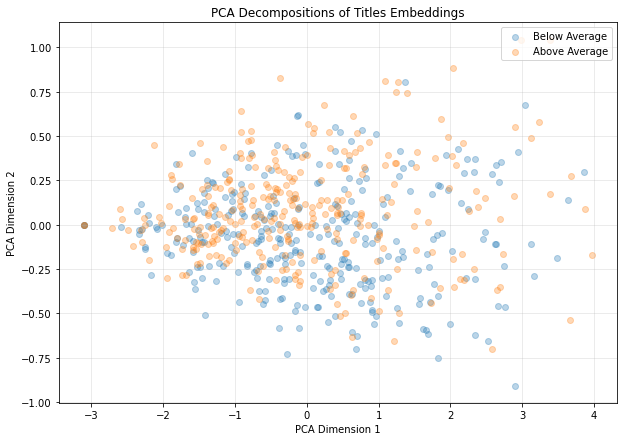

In [66]:
# Set number of components to 2 so we can visualize embeddings in a 2D plot
n_components = 2   

# Instantiate PCA model
pca = PCA(n_components=n_components)

# Transform embeddings using PCA
pca_embeddings = pca.fit_transform(embeddings_test)

# Create labels dictionary
labels_dict = {0: 'Below Average', 1: 'Above Average'}

# Plot PCA decomposition of word embeddings - color code according to topic
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
for i in range(2):
    ax1.scatter(pca_embeddings[np.where(labels_test==i), 0], pca_embeddings[np.where(labels_test==i), 1],
                alpha=0.3, label=labels_dict[i])
# for i in range(NUM_OUTPUTS):
#     ax1.scatter(pca_embeddings[np.where(labels_test==i), 0].mean(), pca_embeddings[np.where(labels_test==i), 1].mean(), 
#                 marker='^', alpha=1, s=100, label='avg {}'.format(labels_dict[i]))
ax1.set_xlabel('PCA Dimension 1')
ax1.set_ylabel('PCA Dimension 2')
ax1.set_title('PCA Decompositions of Titles Embeddings')
ax1.grid(alpha=0.3)
ax1.legend(loc='upper right')

plt.savefig('PCA_titles.png')
# Display plot
plt.show()

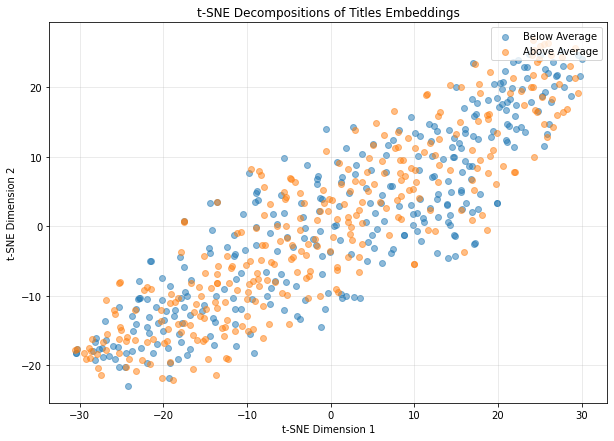

In [67]:
# Set number of components to 2 so we can visualize embeddings in a 2D plot
n_components = 2

# Instantiate t-SNE model
tsne = TSNE(n_components=n_components, random_state=0)

# Transform embeddings using t-SNE
tsne_embeddings = tsne.fit_transform(embeddings_test)

# Plot PCA decomposition of word embeddings - color code according to topic
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
for i in range(2):
    ax1.scatter(tsne_embeddings[np.where(labels_test==i), 0], tsne_embeddings[np.where(labels_test==i), 1],
                alpha=0.5, label=labels_dict[i])
ax1.set_xlabel('t-SNE Dimension 1')
ax1.set_ylabel('t-SNE Dimension 2')
ax1.set_title('t-SNE Decompositions of Titles Embeddings')
ax1.grid(alpha=0.3)
ax1.legend(loc='upper right')

plt.savefig('tSNE_titles.png')
# Display plot
plt.show()